# code to train the model based on the data in the "AAI_ES_A" folder

first import the necessary libraries


In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib as mpl
import random
import PIL
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

dataset_dir = 'AAI_ES_A/'
class_names = ['left','straight','right']

then get the images form the labeled folder; left, right and straight


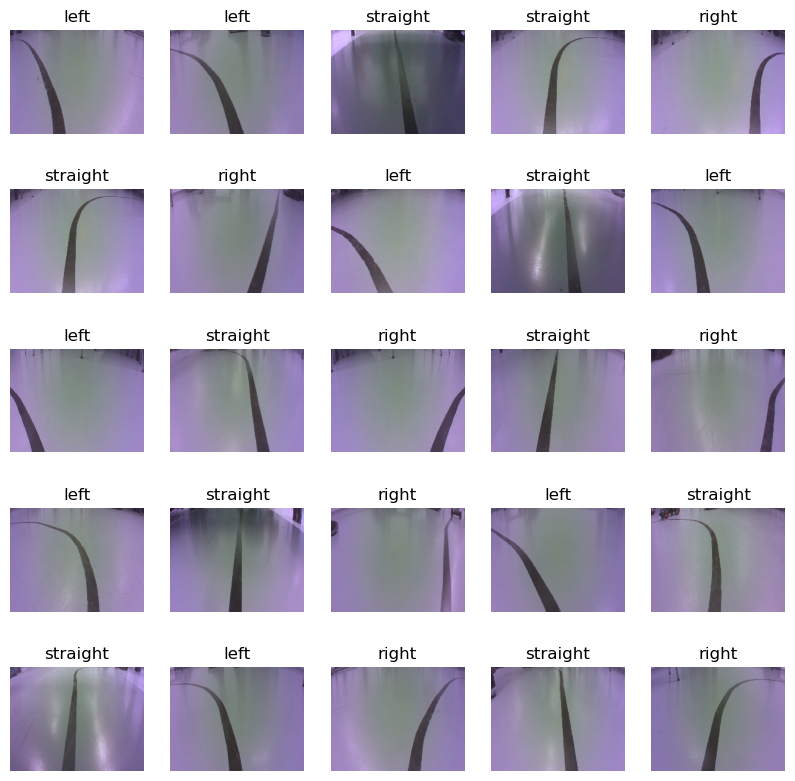

In [14]:
# we will import the png images from the AAI_ES_A folder; the data is labeld by the folder name; left, right, straight

def preprocess(image):
    assert image.shape == (224,224,3)
    # add code for your preprocessiong
    # e.g. crop, scale etc.
    
    return image

data = []
data_labels = []

for class_idx,class_name in enumerate(class_names):
    dir_name = os.path.join(dataset_dir,class_name)
    for file in os.listdir(dir_name):
        if file.endswith('.png'):
            full_path = os.path.join(dir_name,file)
            image = cv2.imread(full_path)
            preprocessed_image = preprocess(image)
            data.append(preprocessed_image)
            data_labels.append(class_idx)

data = np.array(data)
data_labels = np.array(data_labels)

# we mirror the data to increase the dataset, every image is flipped horizontally, and the label is changed accordingly; left becomes right, right becomes left and straight stays straight

data_mirror = np.flip(data,2)
data_mirror_labels = np.copy(data_labels)
data_mirror_labels[data_mirror_labels == 0] = 3
data_mirror_labels[data_mirror_labels == 2] = 0
data_mirror_labels[data_mirror_labels == 3] = 2

# now we concatenate the original data and the mirrored data to get a bigger dataset
data = np.concatenate((data,data_mirror),axis=0)
data_labels = np.concatenate((data_labels,data_mirror_labels),axis=0)

# now crop the top 50 pixels from the image, to remove the sky and the horizon
data = data[:,50:,:,:]

# now we print 25 random images from the dataset inn a 5x5 grid with their labels above
fig,ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        idx = random.randint(0,data.shape[0])
        ax[i,j].imshow(data[idx])
        ax[i,j].set_title(class_names[data_labels[idx]])
        ax[i,j].axis('off')

## split the data into training and validation sets

In [15]:
# first we make a test set, and then we split the remaining data into a validation and a training set
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# now we print the shape of the data
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

X_train shape: (304, 174, 224, 3)
X_val shape: (76, 174, 224, 3)
X_test shape: (96, 174, 224, 3)
